<a href="https://colab.research.google.com/github/NINJAHATTORI004/5TH-SEM-TRAINING/blob/main/day_6_DIVISIVE_CLUSTERING_DIANA_LIKE_APPROACH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def divisive_clustering(data, min_cluster_size=2,max_depth=3):

  cluster=[np.arrange(data.shape[0])]
  cluster_labels=-1*np.ones(data.shape[0])


  def spli_cluster(cluster,depth):
    if depth>=max_depth or len(cluster[cluster_idx]):
      min_cluster_size:
      return

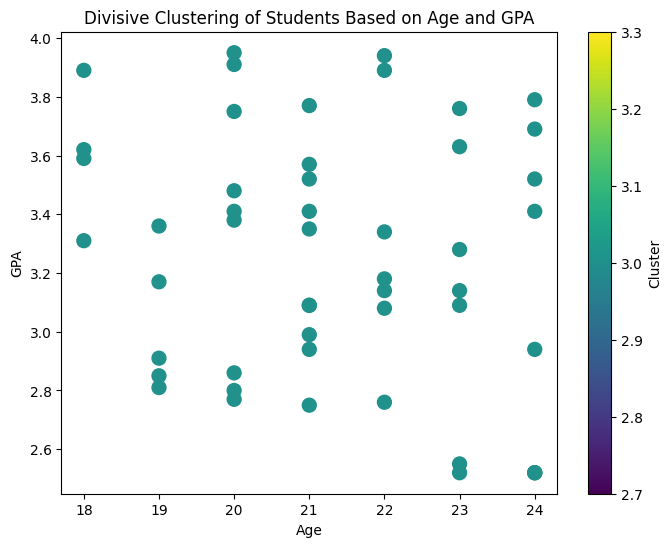

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sample data generation
np.random.seed(42)
num_students = 50
ages = np.random.randint(18, 25, size=num_students)
gpas = np.round(np.random.uniform(2.5, 4.0, size=num_students), 2)
grades = np.random.choice(['A', 'B', 'C'], size=num_students)
departments = np.random.choice(['Computer Science', 'Mathematics', 'Physics', 'Chemistry'], size=num_students)

student_data = {
    'Student ID': range(1, num_students + 1),
    'Name': [f'Student {i}' for i in range(1, num_students + 1)],
    'Department': departments,
    'Age': ages,
    'Grade': grades,
    'GPA': gpas
}

df = pd.DataFrame(student_data)

# Feature scaling
features = df[['Age', 'GPA']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Divisive clustering function
def divisive_clustering(data, min_cluster_size=2, max_depth=3):
    cluster_labels = -1 * np.ones(data.shape[0])  # Initialize all points with -1
    clusters = [np.arange(data.shape[0])]  # Start with a single cluster of all points

    def split_cluster(cluster_indices, depth):
        nonlocal cluster_labels

        # Base case: stop splitting if conditions are met
        if depth >= max_depth or len(cluster_indices) <= min_cluster_size:
            cluster_labels[cluster_indices] = depth  # Assign the current depth as the cluster label
            return

        # Apply K-Means to split the cluster
        kmeans = KMeans(n_clusters=2, random_state=42)
        sub_clusters = kmeans.fit_predict(data[cluster_indices])

        # Split the current cluster into two sub-clusters
        cluster_1 = cluster_indices[sub_clusters == 0]
        cluster_2 = cluster_indices[sub_clusters == 1]

        # Recursively split the resulting sub-clusters
        split_cluster(cluster_1, depth + 1)
        split_cluster(cluster_2, depth + 1)

    # Start splitting from the root cluster
    split_cluster(clusters[0], depth=0)
    return cluster_labels

# Apply divisive clustering
df['Divisive Cluster'] = divisive_clustering(scaled_features)

# Visualize results
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['GPA'], c=df['Divisive Cluster'], cmap='viridis', s=100)
plt.xlabel('Age')
plt.ylabel('GPA')
plt.title('Divisive Clustering of Students Based on Age and GPA')
plt.colorbar(label='Cluster')
plt.show()


divisive clustering(DIANA like approach using KMeans to recursively split the clusters

In [ ]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

def split_cluster(cluster_indices,depth):
    if depth>= max_depth or len(cluster_indices)<=min_cluster_size:
        return
    kmeans=KMeans(n_clusters=2,random_state=42)
    kmeans.fit(data[data])

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the mobile display data
data = {
    'Brand': ['Apple', 'Apple', 'Samsung', 'Samsung', 'Motorola', 'Motorola', 'Nokia', 'Nokia'],
    'Model': ['iPhone 14', 'iPhone 13', 'Galaxy S23', 'Galaxy S22', 'Moto G200', 'Moto Edge 30', 'Nokia X30', 'Nokia G60'],
    'Screen Size (inches)': [6.1, 6.1, 6.1, 6.2, 6.8, 6.5, 6.43, 6.58],
    'Resolution (pixels)': ['2532x1170', '2532x1170', '2340x1080', '2340x1080', '2460x1080', '2400x1080', '2400x1080', '2400x1080'],
    'Price (Rs)': [79900, 69900, 79900, 84900, 59900, 44900, 35000, 25000]
}

df = pd.DataFrame(data)

# Step 2: Preprocessing - Convert the resolution to numeric (width and height in pixels)
df[['Resolution Width', 'Resolution Height']] = df['Resolution (pixels)'].str.split('x', expand=True)
df[['Resolution Width', 'Resolution Height']] = df[['Resolution Width', 'Resolution Height']].astype(int)

# Step 3: Select the features for clustering: 'Screen Size', 'Resolution Width', 'Resolution Height', and 'Price'
features = df[['Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)']]

# Step 4: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Divisive Clustering (DIANA-like approach using KMeans to recursively split the clusters)
def divisive_clustering(data, min_cluster_size=2, max_depth=3):
    # Start with all data in one cluster
    clusters = [np.arange(data.shape[0])]  # list of indices for the whole dataset
    cluster_labels = -1 * np.ones(data.shape[0])  # Initialize cluster labels with -1

    # Recursively split the clusters
    def split_cluster(cluster_idx, depth):
        if depth >= max_depth or len(clusters[cluster_idx]) <= min_cluster_size:
            return

        # Perform KMeans to split the cluster into two
        kmeans = KMeans(n_clusters=2, random_state=42)
        kmeans.fit(data[clusters[cluster_idx]])  # Fit KMeans to the subset of data

        # Assign cluster labels to the indices in this cluster
        cluster_labels[clusters[cluster_idx]] = kmeans.labels_

        # Split the cluster and recurse
        left_cluster_idx = len(clusters)
        right_cluster_idx = len(clusters) + 1
        clusters.append(clusters[cluster_idx][kmeans.labels_ == 0])
        clusters.append(clusters[cluster_idx][kmeans.labels_ == 1])

        split_cluster(left_cluster_idx, depth + 1)
        split_cluster(right_cluster_idx, depth + 1)

    # Initialize splitting
    split_cluster(0, 0)

    return cluster_labels

# Step 6: Apply Divisive Clustering
df['Cluster'] = divisive_clustering(scaled_features)

# Step 7: Visualize the results with a scatter plot
plt.scatter(df['Screen Size (inches)'], df['Price (Rs)'], c=df['Cluster'], cmap='viridis')
plt.title('Divisive Clustering Results')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price (Rs)')
plt.colorbar(label='Cluster')
plt.show()

# Step 8: Display the DataFrame with cluster labels
print(df[['Brand', 'Model', 'Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)', 'Cluster']])

SyntaxError: invalid non-printable character U+00A0 (<ipython-input-2-40046560c973>, line 73)

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the mobile display data
data = {
    'Brand': ['Apple', 'Apple', 'Samsung', 'Samsung', 'Motorola', 'Motorola', 'Nokia', 'Nokia'],
    'Model': ['iPhone 14', 'iPhone 13', 'Galaxy S23', 'Galaxy S22', 'Moto G200', 'Moto Edge 30', 'Nokia X30', 'Nokia G60'],
    'Screen Size (inches)': [6.1, 6.1, 6.1, 6.2, 6.8, 6.5, 6.43, 6.58],
    'Resolution (pixels)': ['2532x1170', '2532x1170', '2340x1080', '2340x1080', '2460x1080', '2400x1080', '2400x1080', '2400x1080'],
    'Price (Rs)': [79900, 69900, 79900, 84900, 59900, 44900, 35000, 25000]
}

df = pd.DataFrame(data)

# Step 2: Preprocessing - Convert the resolution to numeric (width and height in pixels)
df[['Resolution Width', 'Resolution Height']] = df['Resolution (pixels)'].str.split('x', expand=True)
df[['Resolution Width', 'Resolution Height']] = df[['Resolution Width', 'Resolution Height']].astype(int)

# Step 3: Select the features for clustering: 'Screen Size', 'Resolution Width', 'Resolution Height', and 'Price'
features = df[['Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)']]

# Step 4: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Divisive Clustering (DIANA-like approach using KMeans to recursively split the clusters)
def divisive_clustering(data, min_cluster_size=2, max_depth=3):
    # Start with all data in one cluster
    clusters = [np.arange(data.shape[0])]  # list of indices for the whole dataset
    cluster_labels = -1 * np.ones(data.shape[0])  # Initialize cluster labels with -1

    # Recursively split the clusters
    def split_cluster(cluster_idx, depth):
        if depth >= max_depth or len(clusters[cluster_idx]) <= min_cluster_size:
            return

        # Perform KMeans to split the cluster into two
        kmeans = KMeans(n_clusters=2, random_state=42)
        kmeans.fit(data[clusters[cluster_idx]])  # Fit KMeans to the subset of data

        # Assign cluster labels to the indices in this cluster
        cluster_labels[clusters[cluster_idx]] = kmeans.labels_

        # Split the cluster and recurse
        left_cluster_idx = len(clusters)
        right_cluster_idx = len(clusters) + 1
        clusters.append(clusters[cluster_idx][kmeans.labels_ == 0])
        clusters.append(clusters[cluster_idx][kmeans.labels_ == 1])

        split_cluster(left_cluster_idx, depth + 1)
        split_cluster(right_cluster_idx, depth + 1)

    # Initialize splitting
    split_cluster(0, 0)

    return cluster_labels

# Step 6: Apply Divisive Clustering
df['Cluster'] = divisive_clustering(scaled_features)

# Step 7: Visualize the results with a scatter plot
plt.scatter(df['Screen Size (inches)'], df['Price (Rs)'], c=df['Cluster'], cmap='viridis')
plt.title('Divisive Clustering Results')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price (Rs)')
plt.colorbar(label='Cluster')
plt.show()

# Step 8: Display the DataFrame with cluster labels
print(df[['Brand', 'Model', 'Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)', 'Cluster']])

SyntaxError: invalid non-printable character U+00A0 (<ipython-input-4-40046560c973>, line 73)

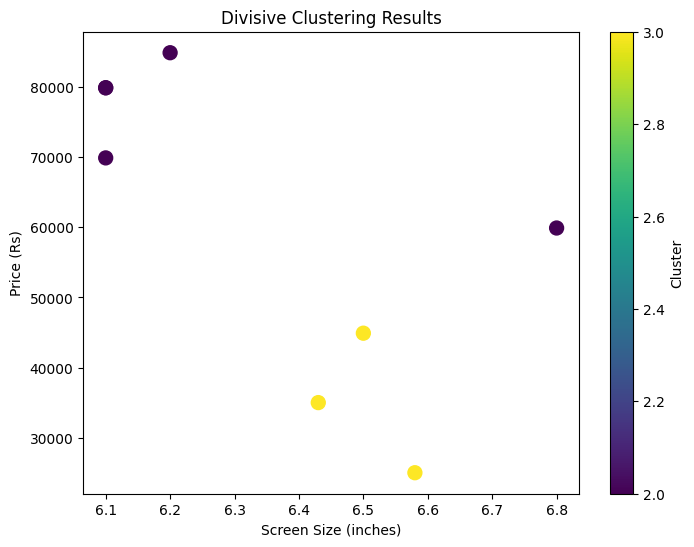

      Brand         Model  Screen Size (inches)  Resolution Width  \
0     Apple     iPhone 14                  6.10              2532   
1     Apple     iPhone 13                  6.10              2532   
2   Samsung    Galaxy S23                  6.10              2340   
3   Samsung    Galaxy S22                  6.20              2340   
4  Motorola     Moto G200                  6.80              2460   
5  Motorola  Moto Edge 30                  6.50              2400   
6     Nokia     Nokia X30                  6.43              2400   
7     Nokia     Nokia G60                  6.58              2400   

   Resolution Height  Price (Rs)  Cluster  
0               1170       79900        2  
1               1170       69900        2  
2               1080       79900        2  
3               1080       84900        2  
4               1080       59900        2  
5               1080       44900        3  
6               1080       35000        3  
7               1080      

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the mobile display data
data = {
    'Brand': ['Apple', 'Apple', 'Samsung', 'Samsung', 'Motorola', 'Motorola', 'Nokia', 'Nokia'],
    'Model': ['iPhone 14', 'iPhone 13', 'Galaxy S23', 'Galaxy S22', 'Moto G200', 'Moto Edge 30', 'Nokia X30', 'Nokia G60'],
    'Screen Size (inches)': [6.1, 6.1, 6.1, 6.2, 6.8, 6.5, 6.43, 6.58],
    'Resolution (pixels)': ['2532x1170', '2532x1170', '2340x1080', '2340x1080', '2460x1080', '2400x1080', '2400x1080', '2400x1080'],
    'Price (Rs)': [79900, 69900, 79900, 84900, 59900, 44900, 35000, 25000]
}

df = pd.DataFrame(data)

# Step 2: Preprocessing - Convert the resolution to numeric (width and height in pixels)
df[['Resolution Width', 'Resolution Height']] = df['Resolution (pixels)'].str.split('x', expand=True)
df[['Resolution Width', 'Resolution Height']] = df[['Resolution Width', 'Resolution Height']].astype(int)

# Step 3: Select the features for clustering: 'Screen Size', 'Resolution Width', 'Resolution Height', and 'Price'
features = df[['Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)']]

# Step 4: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Divisive Clustering (DIANA-like approach using KMeans to recursively split the clusters)
def divisive_clustering(data, min_cluster_size=2, max_depth=3):
    clusters = [np.arange(data.shape[0])]  # List of indices for the whole dataset
    cluster_labels = -1 * np.ones(data.shape[0], dtype=int)  # Initialize cluster labels with -1

    def split_cluster(cluster_indices, depth):
        nonlocal clusters, cluster_labels
        # Base case: stop splitting if conditions are met
        if depth >= max_depth or len(cluster_indices) <= min_cluster_size:
            cluster_labels[cluster_indices] = depth  # Assign the current depth as the cluster label
            return

        # Apply KMeans to split the cluster into two sub-clusters
        kmeans = KMeans(n_clusters=2, random_state=42)
        sub_clusters = kmeans.fit_predict(data[cluster_indices])

        # Split into two clusters based on KMeans labels
        cluster_1 = cluster_indices[sub_clusters == 0]
        cluster_2 = cluster_indices[sub_clusters == 1]

        # Recursively split the resulting sub-clusters
        split_cluster(cluster_1, depth + 1)
        split_cluster(cluster_2, depth + 1)

    # Start splitting from the root cluster
    split_cluster(clusters[0], depth=0)
    return cluster_labels

# Step 6: Apply Divisive Clustering
df['Cluster'] = divisive_clustering(scaled_features)

# Step 7: Visualize the results with a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Screen Size (inches)'], df['Price (Rs)'], c=df['Cluster'], cmap='viridis', s=100)
plt.title('Divisive Clustering Results')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price (Rs)')
plt.colorbar(label='Cluster')
plt.show()

# Step 8: Display the DataFrame with cluster labels
print(df[['Brand', 'Model', 'Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)', 'Cluster']])


WITH DENDROGRAM IS MENTIONED BELOW

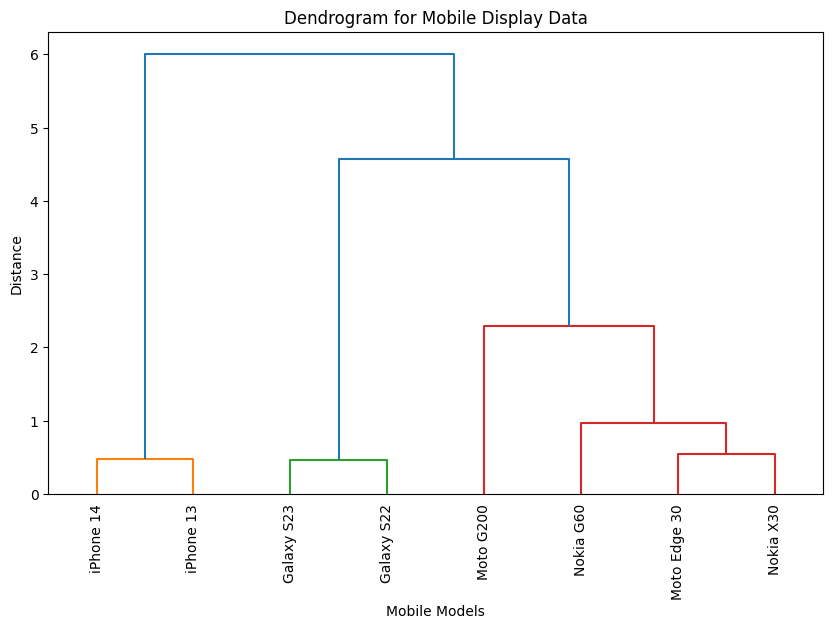

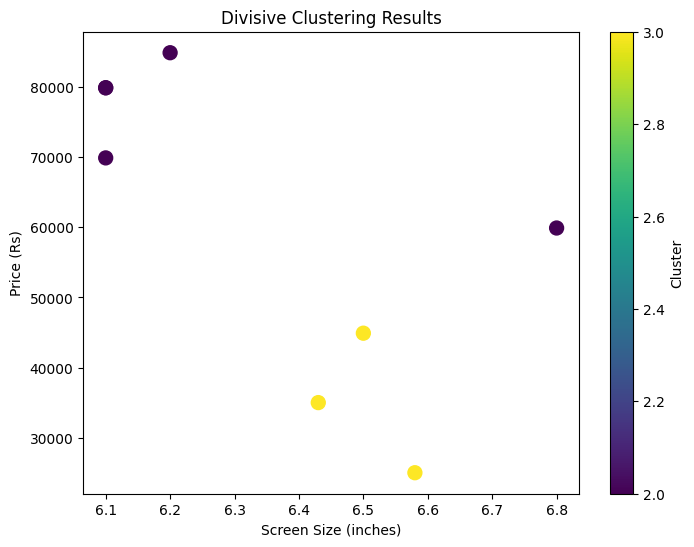

      Brand         Model  Screen Size (inches)  Resolution Width  \
0     Apple     iPhone 14                  6.10              2532   
1     Apple     iPhone 13                  6.10              2532   
2   Samsung    Galaxy S23                  6.10              2340   
3   Samsung    Galaxy S22                  6.20              2340   
4  Motorola     Moto G200                  6.80              2460   
5  Motorola  Moto Edge 30                  6.50              2400   
6     Nokia     Nokia X30                  6.43              2400   
7     Nokia     Nokia G60                  6.58              2400   

   Resolution Height  Price (Rs)  Cluster  
0               1170       79900        2  
1               1170       69900        2  
2               1080       79900        2  
3               1080       84900        2  
4               1080       59900        2  
5               1080       44900        3  
6               1080       35000        3  
7               1080      

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load the mobile display data
data = {
    'Brand': ['Apple', 'Apple', 'Samsung', 'Samsung', 'Motorola', 'Motorola', 'Nokia', 'Nokia'],
    'Model': ['iPhone 14', 'iPhone 13', 'Galaxy S23', 'Galaxy S22', 'Moto G200', 'Moto Edge 30', 'Nokia X30', 'Nokia G60'],
    'Screen Size (inches)': [6.1, 6.1, 6.1, 6.2, 6.8, 6.5, 6.43, 6.58],
    'Resolution (pixels)': ['2532x1170', '2532x1170', '2340x1080', '2340x1080', '2460x1080', '2400x1080', '2400x1080', '2400x1080'],
    'Price (Rs)': [79900, 69900, 79900, 84900, 59900, 44900, 35000, 25000]
}

df = pd.DataFrame(data)

# Step 2: Preprocessing - Convert the resolution to numeric (width and height in pixels)
df[['Resolution Width', 'Resolution Height']] = df['Resolution (pixels)'].str.split('x', expand=True)
df[['Resolution Width', 'Resolution Height']] = df[['Resolution Width', 'Resolution Height']].astype(int)

# Step 3: Select the features for clustering: 'Screen Size', 'Resolution Width', 'Resolution Height', and 'Price'
features = df[['Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)']]

# Step 4: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Divisive Clustering (DIANA-like approach using KMeans to recursively split the clusters)
def divisive_clustering(data, min_cluster_size=2, max_depth=3):
    clusters = [np.arange(data.shape[0])]  # List of indices for the whole dataset
    cluster_labels = -1 * np.ones(data.shape[0], dtype=int)  # Initialize cluster labels with -1

    def split_cluster(cluster_indices, depth):
        nonlocal clusters, cluster_labels
        # Base case: stop splitting if conditions are met
        if depth >= max_depth or len(cluster_indices) <= min_cluster_size:
            cluster_labels[cluster_indices] = depth  # Assign the current depth as the cluster label
            return

        # Apply KMeans to split the cluster into two sub-clusters
        kmeans = KMeans(n_clusters=2, random_state=42)
        sub_clusters = kmeans.fit_predict(data[cluster_indices])

        # Split into two clusters based on KMeans labels
        cluster_1 = cluster_indices[sub_clusters == 0]
        cluster_2 = cluster_indices[sub_clusters == 1]

        # Recursively split the resulting sub-clusters
        split_cluster(cluster_1, depth + 1)
        split_cluster(cluster_2, depth + 1)

    # Start splitting from the root cluster
    split_cluster(clusters[0], depth=0)
    return cluster_labels

# Step 6: Apply Divisive Clustering
df['Cluster'] = divisive_clustering(scaled_features)

# Step 7: Visualize the dendrogram
linkage_matrix = linkage(scaled_features, method='ward')  # Generate linkage matrix for dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=df['Model'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram for Mobile Display Data')
plt.xlabel('Mobile Models')
plt.ylabel('Distance')
plt.show()

# Step 8: Visualize the clustering results with a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Screen Size (inches)'], df['Price (Rs)'], c=df['Cluster'], cmap='viridis', s=100)
plt.title('Divisive Clustering Results')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price (Rs)')
plt.colorbar(label='Cluster')
plt.show()

# Step 9: Display the DataFrame with cluster labels
print(df[['Brand', 'Model', 'Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)', 'Cluster']])


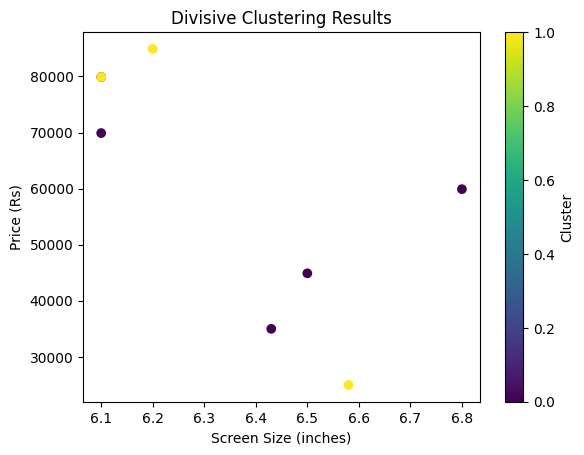

      Brand         Model  Screen Size (inches)  Resolution Width  \
0     Apple     iPhone 14                  6.10              2532   
1     Apple     iPhone 13                  6.10              2532   
2   Samsung    Galaxy S23                  6.10              2340   
3   Samsung    Galaxy S22                  6.20              2340   
4  Motorola     Moto G200                  6.80              2460   
5  Motorola  Moto Edge 30                  6.50              2400   
6     Nokia     Nokia X30                  6.43              2400   
7     Nokia     Nokia G60                  6.58              2400   

   Resolution Height  Price (Rs)  Cluster  
0               1170       79900      0.0  
1               1170       69900      0.0  
2               1080       79900      1.0  
3               1080       84900      1.0  
4               1080       59900      0.0  
5               1080       44900      0.0  
6               1080       35000      0.0  
7               1080      

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the mobile display data
data = {
    'Brand': ['Apple', 'Apple', 'Samsung', 'Samsung', 'Motorola', 'Motorola', 'Nokia', 'Nokia'],
    'Model': ['iPhone 14', 'iPhone 13', 'Galaxy S23', 'Galaxy S22', 'Moto G200', 'Moto Edge 30', 'Nokia X30', 'Nokia G60'],
    'Screen Size (inches)': [6.1, 6.1, 6.1, 6.2, 6.8, 6.5, 6.43, 6.58],
    'Resolution (pixels)': ['2532x1170', '2532x1170', '2340x1080', '2340x1080', '2460x1080', '2400x1080', '2400x1080', '2400x1080'],
    'Price (Rs)': [79900, 69900, 79900, 84900, 59900, 44900, 35000, 25000]
}

df = pd.DataFrame(data)

# Step 2: Preprocessing - Convert the resolution to numeric (width and height in pixels)
df[['Resolution Width', 'Resolution Height']] = df['Resolution (pixels)'].str.split('x', expand=True)
df[['Resolution Width', 'Resolution Height']] = df[['Resolution Width', 'Resolution Height']].astype(int)

# Step 3: Select the features for clustering: 'Screen Size', 'Resolution Width', 'Resolution Height', and 'Price'
features = df[['Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)']]

# Step 4: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 5: Divisive Clustering (DIANA-like approach using KMeans to recursively split the clusters)
def divisive_clustering(data, min_cluster_size=2, max_depth=3):
    # Start with all data in one cluster
    clusters = [np.arange(data.shape[0])]  # list of indices for the whole dataset
    cluster_labels = -1 * np.ones(data.shape[0])  # Initialize cluster labels with -1

    # Recursively split the clusters
    def split_cluster(cluster_idx, depth):
        if depth >= max_depth or len(clusters[cluster_idx]) <= min_cluster_size:
            return

        # Perform KMeans to split the cluster into two
        kmeans = KMeans(n_clusters=2, random_state=42)
        kmeans.fit(data[clusters[cluster_idx]])  # Fit KMeans to the subset of data

        # Assign cluster labels to the indices in this cluster
        cluster_labels[clusters[cluster_idx]] = kmeans.labels_

        # Split the cluster and recurse
        left_cluster_idx = len(clusters)
        right_cluster_idx = len(clusters) + 1
        clusters.append(clusters[cluster_idx][kmeans.labels_ == 0])
        clusters.append(clusters[cluster_idx][kmeans.labels_ == 1])

        split_cluster(left_cluster_idx, depth + 1)
        split_cluster(right_cluster_idx, depth + 1)

    # Initialize splitting
    split_cluster(0, 0)

    return cluster_labels

# Step 6: Apply Divisive Clustering
df['Cluster'] = divisive_clustering(scaled_features)

# Step 7: Visualize the results with a scatter plot
plt.scatter(df['Screen Size (inches)'], df['Price (Rs)'], c=df['Cluster'], cmap='viridis')
plt.title('Divisive Clustering Results')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price (Rs)')
plt.colorbar(label='Cluster')
plt.show()

# Step 8: Display the DataFrame with cluster labels
print(df[['Brand', 'Model', 'Screen Size (inches)', 'Resolution Width', 'Resolution Height', 'Price (Rs)', 'Cluster']])